In [1]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('united_airlines_actual.csv')

In [6]:
df.head(10)


,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_tone,customer_tone,average_sentiment,silence_percent_average,primary_call_reason,customer_name,elite_level_code,AHT,AST
0,4667960400,2033123310,963118,2024-07-31 23:56:00,01-08-2024 00:03,01-08-2024 00:34,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.04,0.39,Voluntary Cancel,Matthew Foster,4,2024-10-09 00:31:00,2024-10-09 00:07:00
1,1122072124,8186702651,519057,2024-08-01 00:03:00,01-08-2024 00:06,01-08-2024 00:18,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Booking,Tammy Walters,0,2024-10-09 00:12:00,2024-10-09 00:03:00
2,6834291559,2416856629,158319,2024-07-31 23:59:00,01-08-2024 00:07,01-08-2024 00:26,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.04,0.39,IRROPS,Jeffery Dixon,0,2024-10-09 00:19:00,2024-10-09 00:08:00
3,2266439882,1154544516,488324,2024-08-01 00:05:00,01-08-2024 00:10,01-08-2024 00:17,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.04,0.39,Upgrade,David Wilkins,2,2024-10-09 00:07:00,2024-10-09 00:05:00
4,1211603231,5214456437,721730,2024-08-01 00:04:00,01-08-2024 00:14,01-08-2024 00:23,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.04,0.39,Seating,Elizabeth Daniels,0,2024-10-09 00:09:00,2024-10-09 00:10:00
5,5297766997,5590154991,817160,2024-08-01 00:11:00,01-08-2024 00:16,01-08-2024 00:40,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Mileage Plus,Emily Alexander,5,2024-10-09 00:24:00,2024-10-09 00:05:00
6,324593040,6774865122,519057,2024-08-01 00:08:00,01-08-2024 00:21,01-08-2024 00:34,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Checkout,James Lawrence,0,2024-10-09 00:13:00,2024-10-09 00:13:00
7,8902603117,7974326984,488324,2024-08-01 00:13:00,01-08-2024 00:21,01-08-2024 00:29,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.04,0.39,Mileage Plus,Megan Craig,2,2024-10-09 00:08:00,2024-10-09 00:08:00
8,7222687732,8023417234,957331,2024-08-01 00:14:00,01-08-2024 00:22,01-08-2024 00:35,\n\nAgent: Thank you for calling United Airlin...,calm,neutral,0.02,0.35,Mileage Plus,Alexa Martinez,1,2024-10-09 00:13:00,2024-10-09 00:08:00
9,4113684017,1528835057,158319,2024-08-01 00:20:00,01-08-2024 00:28,01-08-2024 00:37,\n\nAgent: Thank you for calling United Airlin...,neutral,angry,-0.04,0.39,IRROPS,Jonathan Parker,0,2024-10-09 00:09:00,2024-10-09 00:08:00


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  71810 non-null  int64         
 1   customer_id              71810 non-null  int64         
 2   agent_id                 71810 non-null  int64         
 3   call_start_datetime      71810 non-null  datetime64[ns]
 4   agent_assigned_datetime  71810 non-null  object        
 5   call_end_datetime        71810 non-null  object        
 6   call_transcript          71810 non-null  object        
 7   agent_tone               71810 non-null  object        
 8   customer_tone            71587 non-null  object        
 9   average_sentiment        71587 non-null  float64       
 10  silence_percent_average  71587 non-null  float64       
 11  primary_call_reason      66653 non-null  object        
 12  customer_name            71810 n

In [8]:
df.describe

<bound method NDFrame.describe of           call_id  customer_id  agent_id call_start_datetime  \
0      4667960400   2033123310    963118 2024-07-31 23:56:00   
1      1122072124   8186702651    519057 2024-08-01 00:03:00   
2      6834291559   2416856629    158319 2024-07-31 23:59:00   
3      2266439882   1154544516    488324 2024-08-01 00:05:00   
4      1211603231   5214456437    721730 2024-08-01 00:04:00   
...           ...          ...       ...                 ...   
71805  1563273072   8022667294    413148 2024-08-31 23:48:00   
71806  8865997781   4474867021    980156 2024-08-31 23:55:00   
71807  8019240181   9762042472    616988 2024-08-31 23:52:00   
71808  8332067080   8095620266    161354 2024-08-31 23:53:00   
71809  8210720833   8014388758    547592 2024-08-31 23:49:00   

      agent_assigned_datetime call_end_datetime  \
0            01-08-2024 00:03  01-08-2024 00:34   
1            01-08-2024 00:06  01-08-2024 00:18   
2            01-08-2024 00:07  01-08-2024 00

In [9]:
df.shape

(71810, 16)

In [10]:
df['AHT'] = pd.to_datetime(df['AHT'])
df['AST'] = pd.to_datetime(df['AST'])

In [11]:
X = df[[ 'agent_tone', 'customer_tone', 'average_sentiment', 'silence_percent_average']]
y_aht = df['AHT']  # Target for AHT
y_ast = df['AST']  # Target for AST


In [12]:
X = pd.get_dummies(X, drop_first=True)

In [13]:
X_train_aht, X_test_aht, y_train_aht, y_test_aht = train_test_split(X, y_aht, test_size=0.2, random_state=42)
X_train_ast, X_test_ast, y_train_ast, y_test_ast = train_test_split(X, y_ast, test_size=0.2, random_state=42)

In [14]:
rf_aht = RandomForestRegressor(n_estimators=100, random_state=42)
rf_ast = RandomForestRegressor(n_estimators=100, random_state=42)

In [15]:
rf_aht.fit(X_train_aht, y_train_aht)
rf_ast.fit(X_train_ast, y_train_ast)

RandomForestRegressor(random_state=42)

In [16]:
y_pred_aht = rf_aht.predict(X_test_aht)
y_pred_ast = rf_ast.predict(X_test_ast)

In [18]:
feature_importance_aht = pd.Series(rf_aht.feature_importances_, index=X.columns)
feature_importance_ast = pd.Series(rf_ast.feature_importances_, index=X.columns)

In [19]:
print("Feature Importance for AHT:")
print(feature_importance_aht.sort_values(ascending=False))

print("Feature Importance for AST:")
print(feature_importance_ast.sort_values(ascending=False))

Feature Importance for AHT:
average_sentiment           0.0
silence_percent_average     0.0
agent_tone_angry            0.0
agent_tone_calm             0.0
agent_tone_frustrated       0.0
agent_tone_neutral          0.0
customer_tone_frustrated    0.0
customer_tone_neutral       0.0
customer_tone_polite        0.0
dtype: float64
Feature Importance for AST:
average_sentiment           0.0
silence_percent_average     0.0
agent_tone_angry            0.0
agent_tone_calm             0.0
agent_tone_frustrated       0.0
agent_tone_neutral          0.0
customer_tone_frustrated    0.0
customer_tone_neutral       0.0
customer_tone_polite        0.0
dtype: float64


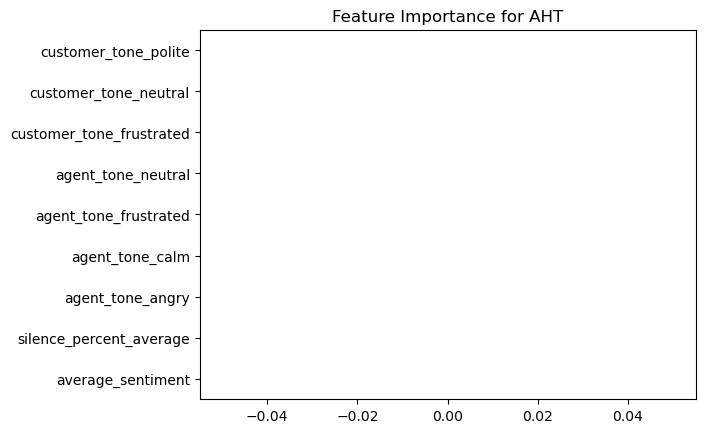

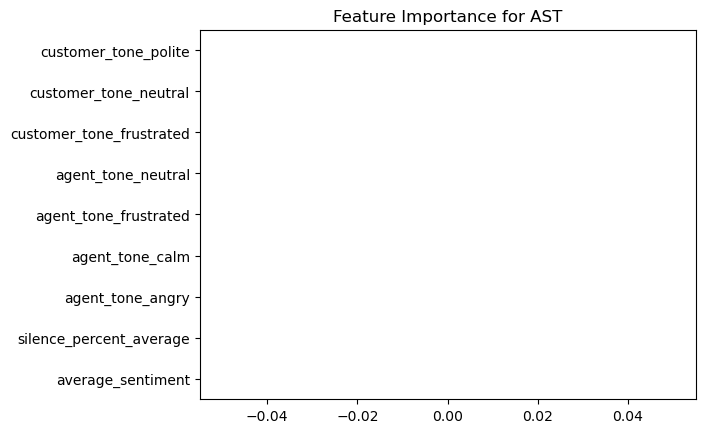

NameError: name 'x' is not defined

In [23]:
import matplotlib.pyplot as plt

feature_importance_aht.sort_values(ascending=False).plot(kind='barh', title="Feature Importance for AHT")
plt.show()

feature_importance_ast.sort_values(ascending=False).plot(kind='barh', title="Feature Importance for AST")
plt.show()

df.plot.scatter(x,y)

In [21]:
aht_by_reason = df.groupby('primary_call_reason')['AHT'].mean()
percent_difference = (aht_by_reason.max() - aht_by_reason.min()) / aht_by_reason.mean() * 100

print(f"Percentage difference in AHT between most frequent and least frequent call reasons: {percent_difference:.2f}%")

TypeError: unsupported operand type(s) for /: 'Timedelta' and 'Timestamp'